<a href="https://colab.research.google.com/github/jonathanhicks97/MLTSA22_JHicks/blob/main/HW5/HW5_JHicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd drive/MyDrive/MLTSA22

/content/drive/MyDrive/MLTSA22


In [2]:
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel

--2022-03-13 16:14:13--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel
Resolving api.worldbank.org (api.worldbank.org)... 52.188.136.184
Connecting to api.worldbank.org (api.worldbank.org)|52.188.136.184|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195584 (191K) [application/vnd.ms-excel]
Saving to: ‘SP.POP.TOTL?downloadformat=excel.5’

SP.POP.TOTL?downloa 100%[===================>] 191.00K  --.-KB/s    in 0.06s   

2022-03-13 16:14:14 (3.10 MB/s) - ‘SP.POP.TOTL?downloadformat=excel.5’ saved [195584/195584]



In [3]:
ls

 HW2/
 my_apis.csv
 New+york,ny.csv
'SP.POP.TOTL?downloadformat=excel'
'SP.POP.TOTL?downloadformat=excel.1'
'SP.POP.TOTL?downloadformat=excel.2'
'SP.POP.TOTL?downloadformat=excel.3'
'SP.POP.TOTL?downloadformat=excel.4'
'SP.POP.TOTL?downloadformat=excel.5'
 United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv


In [59]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn import cluster
!pip install xlrd==1.2.0
from sklearn.cluster import AgglomerativeClustering


In [5]:
pop_df = pd.read_excel('SP.POP.TOTL?downloadformat=excel',skiprows=3, header = 0, usecols = [0] + list(range(4,100)))
pop_df.set_index("Country Name")
pop_df_clean = pop_df.dropna(axis=1, how = 'all').dropna(axis=0, how='any')
pop_df_clean = pop_df_clean.set_index('Country Name')



/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


Text(0, 0.5, 'pop')

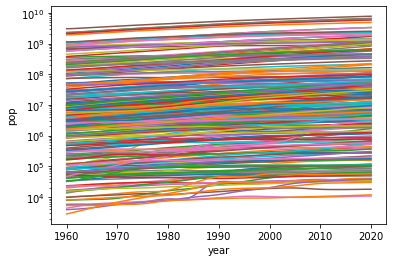

In [6]:
pop_df_clean.T.plot(legend = False, logy = True)
pl.xlabel('year')
pl.ylabel('pop')

In [120]:
x = preprocessing.scale(pop_df_clean, axis = 1)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


(262, 61)

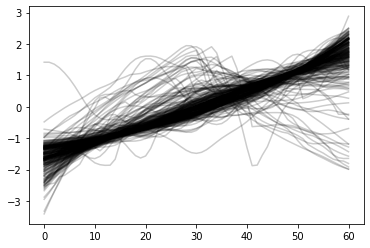

In [8]:
pl.plot(x.T, 'k', alpha = 0.2);

In [40]:
c = cluster.k_means(x, n_clusters = 4, random_state = 1000)
c_mean_0 = np.mean(x[c[1] == 0], axis = 0)
c_mean_1 = np.mean(x[c[1] == 1], axis = 0)
c_mean_2 = np.mean(x[c[1] == 2], axis = 0)
c_mean_3 = np.mean(x[c[1] == 3], axis = 0)


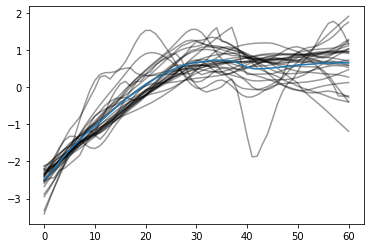

In [39]:
pl.plot(x[c[1] == 0].T,  'k', alpha = 0.4);
pl.plot(c_mean_0)


Cluster 0 of data. This shows the result of one k-means clustered group. This group has a general upward trend with plateau After about 30 years

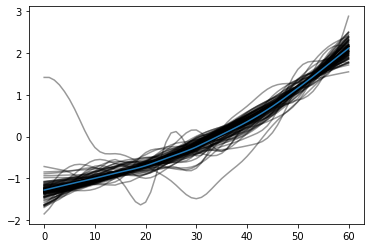

In [41]:
pl.plot(x[c[1] == 1].T, 'k', alpha = 0.4);
pl.plot(c_mean_1)

Cluster 1 of data. This shows the result of one k-means clustered group. This group has a general upward trend growing exponentially

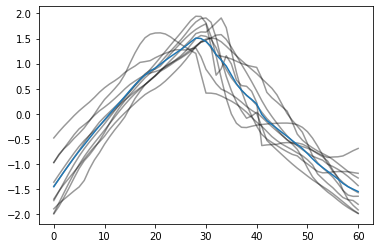

In [42]:
pl.plot(x[c[1] == 2].T, 'k', alpha = 0.4);
pl.plot(c_mean_2)

Cluster 2 of data. This shows the result of one k-means clustered group. This group has a general upward trend until about year 30 and then goes back down to the same level as year zero(approximately)

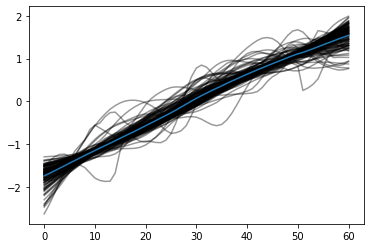

In [43]:
pl.plot(x[c[1] == 3].T, 'k', alpha = 0.4);
pl.plot(c_mean_3)

Cluster 3 of data. This shows the result of one k-means clustered group. This group has a general upward trend. It does not appear to be exponential, but linear.

## Question 2

In [48]:
print("Number of countries in each cluster. The two smallest clusters are cluster 0 and cluster 2")
for i in np.unique(c[1]):
  print(i,':',sum(c[1] == i))

Number of countries in each cluster. The two smallest clusters are cluster 0 and cluster 2
0 : 27
1 : 105
2 : 10
3 : 120


In [50]:
pop_df_clean.loc[c[1]==0]


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0
Armenia,1874119.0,1941498.0,2009524.0,2077584.0,2145004.0,2211316.0,2276038.0,2339133.0,2401142.0,2462938.0,...,2876536.0,2884239.0,2897593.0,2912403.0,2925559.0,2936147.0,2944789.0,2951741.0,2957728.0,2963234.0
Belarus,8198000.0,8271216.0,8351928.0,8437232.0,8524224.0,8610000.0,8696496.0,8785648.0,8874552.0,8960304.0,...,9461643.0,9446836.0,9443211.0,9448515.0,9461076.0,9469379.0,9458989.0,9438785.0,9419758.0,9379952.0
Central Europe and the Baltics,91401764.0,92232738.0,93009498.0,93840016.0,94715795.0,95440988.0,96146336.0,97043270.0,97884022.0,98606630.0,...,104174038.0,103935318.0,103713726.0,103496179.0,103257886.0,102994278.0,102740078.0,102538451.0,102398537.0,102253057.0
Cuba,7141241.0,7291201.0,7453535.0,7623300.0,7793258.0,7958171.0,8115487.0,8266373.0,8413549.0,8561391.0,...,11236671.0,11257112.0,11282722.0,11306909.0,11324777.0,11335108.0,11339255.0,11338146.0,11333484.0,11326616.0
Curacao,124826.0,126125.0,128414.0,130860.0,133148.0,135266.0,136682.0,138140.0,140298.0,142581.0,...,150831.0,152088.0,153822.0,155909.0,157980.0,159664.0,160175.0,159336.0,157441.0,155014.0
Czech Republic,9602006.0,9586651.0,9624660.0,9670685.0,9727804.0,9779358.0,9821040.0,9852899.0,9876346.0,9896580.0,...,10496088.0,10510785.0,10514272.0,10525347.0,10546059.0,10566332.0,10594438.0,10629928.0,10671870.0,10698896.0
Dominica,60020.0,61036.0,61978.0,62917.0,63921.0,65044.0,66300.0,67687.0,69034.0,70214.0,...,70912.0,70954.0,71019.0,71091.0,71175.0,71307.0,71460.0,71626.0,71808.0,71991.0
Faroe Islands,34624.0,35074.0,35521.0,35965.0,36409.0,36843.0,37283.0,37705.0,38131.0,38560.0,...,47815.0,47843.0,47901.0,47965.0,48055.0,48173.0,48326.0,48497.0,48677.0,48865.0


I'm not sure what happened in these countries to cause a population plateau. This may have just been due to the wealth of the countries prohibiting further growth as they maximize resources.

In [51]:
pop_df_clean.loc[c[1]==2]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Bulgaria,7867374.0,7943118.0,8012946.0,8078145.0,8144340.0,8204168.0,8258057.0,8310226.0,8369603.0,8434172.0,...,7348328.0,7305888.0,7265115.0,7223938.0,7177991.0,7127822.0,7075947.0,7025037.0,6975761.0,6934015.0
Bosnia and Herzegovina,3225664.0,3288604.0,3353228.0,3417573.0,3478999.0,3535632.0,3586630.0,3632678.0,3675448.0,3717476.0,...,3661173.0,3604972.0,3542598.0,3482106.0,3429362.0,3386263.0,3351534.0,3323929.0,3300998.0,3280815.0
Estonia,1211537.0,1225077.0,1241623.0,1258857.0,1277086.0,1294566.0,1308597.0,1318946.0,1331214.0,1345249.0,...,1327439.0,1322696.0,1317997.0,1314545.0,1315407.0,1315790.0,1317384.0,1321977.0,1326898.0,1331057.0
Georgia,3645600.0,3703600.0,3760300.0,3816100.0,3870300.0,3921600.0,3966700.0,4005800.0,4042300.0,4080300.0,...,3756441.0,3728874.0,3717668.0,3719414.0,3725276.0,3727505.0,3728004.0,3726549.0,3720161.0,3714000.0
Croatia,4140181.0,4167292.0,4196712.0,4225675.0,4252876.0,4280923.0,4310701.0,4338683.0,4365628.0,4391490.0,...,4280622.0,4267558.0,4255689.0,4238389.0,4203604.0,4174349.0,4124531.0,4087843.0,4065253.0,4047200.0
Hungary,9983967.0,10029321.0,10061734.0,10087947.0,10119835.0,10147935.0,10178653.0,10216604.0,10255815.0,10298723.0,...,9971727.0,9920362.0,9893082.0,9866468.0,9843028.0,9814023.0,9787966.0,9775564.0,9771141.0,9749763.0
Lithuania,2778550.0,2823550.0,2863350.0,2898950.0,2935200.0,2971450.0,3008050.0,3044400.0,3078850.0,3107321.0,...,3028115.0,2987773.0,2957689.0,2932367.0,2904910.0,2868231.0,2828403.0,2801543.0,2794137.0,2794700.0
Latvia,2120979.0,2152681.0,2181586.0,2210919.0,2240623.0,2265919.0,2283217.0,2301220.0,2323619.0,2343173.0,...,2059709.0,2034319.0,2012647.0,1993782.0,1977527.0,1959537.0,1942248.0,1927174.0,1913822.0,1901548.0
Romania,18406905.0,18555250.0,18676550.0,18797850.0,18919126.0,19031576.0,19215450.0,19534242.0,19799831.0,20009141.0,...,20147528.0,20058035.0,19983693.0,19908979.0,19815616.0,19702267.0,19588715.0,19473970.0,19371648.0,19286123.0


These are all eastern european countries which saw a population decline in the 1990s. This may be due to the collapse of the USSR

1.0

## Question 3

Text(0, 0.5, 'Variance')

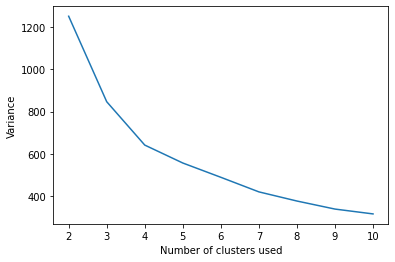

In [140]:
from matplotlib.pyplot import xlabel
variance_by_c = []
n_clusters = []
for n in range(2,11):
  var = 0
  cluster_n = cluster.k_means(x, n_clusters = n, random_state = 4)
  for grouping in range(0,n): #For each group of clusters
    mean_of_cluster = np.mean(x[cluster_n[1] == grouping], axis = 0)#np.var(x[cluster_n[1] == grouping], axis = 0)
    var_of_cluster = sum(((x[cluster_n[1] == grouping] - mean_of_cluster)**2))
    var = var + var_of_cluster
  variance_by_c.append(sum(var))
  n_clusters.append(n)

pl.plot(n_clusters,variance_by_c)
pl.xlabel('Number of clusters used')
pl.ylabel('Variance')


Elbow graph. This graph shows overall variance as a measure of number of clusters used. It is noteworthy that with increasing number of clusters, variance will always go down, but not necessarily because of necessity. Typically, the point of maximum concavity(third derivative = 0) is used to show the optimal number of clusters used. In this graph, this appears to be about 4 clusters.